In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear regression with many variables

In [20]:
data = pd.read_csv('/home/kuba/wakacje/machine lerning/house_king_county.csv')

X = data[['sqft_living','bedrooms','bathrooms','sqft_basement']]
y = data['price']

X = np.array(X)
y = np.array(y)


data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


[Text(0, 0.5, 'price'), Text(0.5, 0, 'sqft_basement')]

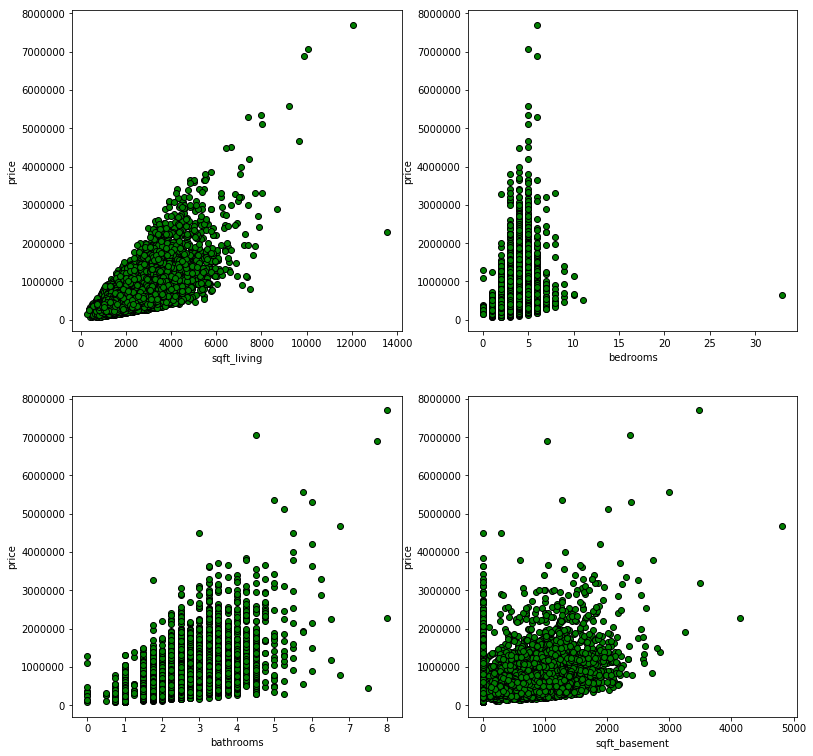

In [34]:
def normalizen(X):
    """
    X - n-column numpy ndarray
    """
    n = X.shape[1]
    Y = np.zeros(X.shape)
    for i in range(n):
        Y[:,i]= (X[:,i] - X[:,i].mean())/X[:,i].std()
    return Y

In [65]:
def GradientDescent_n(X,y,theta,alpha):
    """
    X - m x (n+1) with first column of ones 
    y - vector to learn from 
    alpha - learning rate
    
    """
    n = X.shape[1]
    m = X.shape[0]
    
    df_n = np.zeros(n)
    
    while True:
        for j in range(n): 
            df_n[j] = (1/m)*(X@theta -y)@X[:,j]
        
        theta = theta - alpha * df_n
        if abs(df_n).sum() <= 0.001: # when all partial derivatives equal zero we are in extremum
            break
            
    return theta

In [37]:
# standarize our variables 
Xn = normalizen(X)
yn = (y-y.mean())/y.std()

[Text(0, 0.5, 'price'), Text(0.5, 0, 'sqft_basement')]

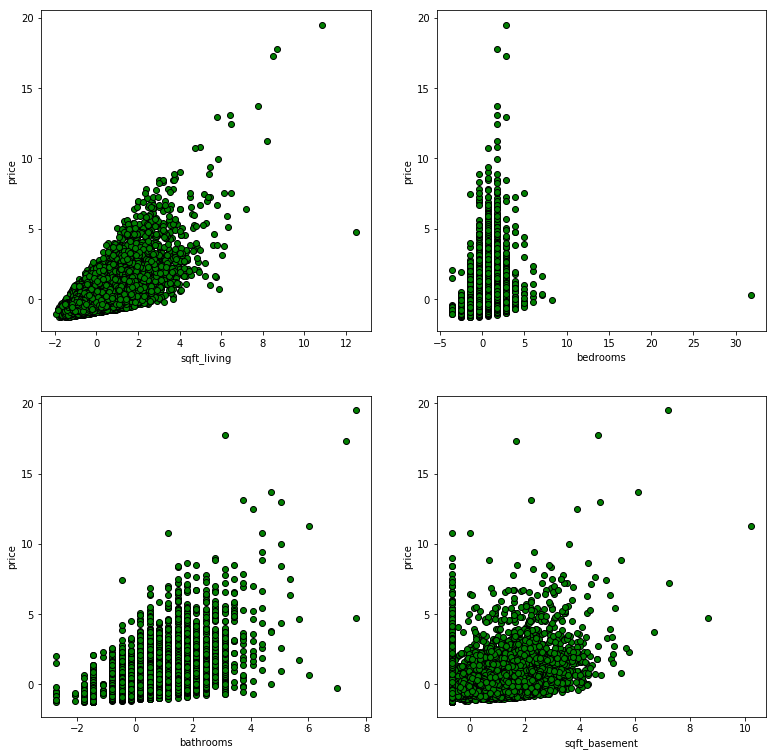

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(13,13))
axs[0,0].plot(Xn[:,0],yn,'go', mec = 'black')
axs[0,0].set(xlabel='sqft_living', ylabel = 'price')
axs[0,1].plot(Xn[:,1],yn,'go', mec = 'black')
axs[0,1].set(xlabel='bedrooms', ylabel = 'price')
axs[1,0].plot(Xn[:,2],yn,'go', mec = 'black')
axs[1,0].set(xlabel='bathrooms', ylabel = 'price')
axs[1,1].plot(Xn[:,3],yn,'go', mec = 'black')
axs[1,1].set(xlabel='sqft_basement', ylabel = 'price')

In [42]:
X_1 = np.c_[np.ones(Xn.shape[0]),Xn]

In [56]:
theta = np.ones(5)
alpha = 0.01


theta= GradientDescent_n(X_1, yn,theta, alpha)
theta

array([ 1.62254330e-11,  7.56107965e-01, -1.49447451e-01,  2.23774299e-02,
        3.39235238e-02])

In [68]:
# let's check if our linear regression is goog predictor
Xp = X_1[:5000,:]
yp = yn[:5000]
A = Xp.transpose() @ Xp 
B = np.linalg.inv(A)

theta1 = B @ Xp.transpose() @ yp
theta1

array([ 0.01482219,  0.81691078, -0.17091575,  0.00694813,  0.01544462])

In [70]:
abs(theta1- theta)

array([0.01482219, 0.06080281, 0.0214683 , 0.0154293 , 0.0184789 ])

It isn't very different than algebraic one. Let's see how it scores with coeficient R^2

In [73]:
# 1 - u/v 
u = ((yn-X_1@theta)**2).sum()
v = ((yn - yn.mean())**2).sum()

1- u/v

0.5078150973141649

Preety good :) 